In [21]:
pip install sklearn


  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing basic liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading csv file contains 10 headers
df=pd.read_csv("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [5]:
#one hot encoding
tem=pd.get_dummies(df["region"])
tem.head(10)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


In [6]:
df.drop("region", axis=1, inplace=True)

In [7]:
df.head(10)

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86
5,31,female,25.7,0,no,3756.62
6,46,female,33.4,1,no,8240.59
7,37,female,27.7,3,no,7281.51
8,37,male,29.8,2,no,6406.41
9,60,female,25.8,0,no,28923.14


In [8]:
#combining both data frames
df=pd.concat([df,tem], axis=1)
df.head(10)

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,female,27.9,0,yes,16884.92,0,0,0,1
1,18,male,33.8,1,no,1725.55,0,0,1,0
2,28,male,33.0,3,no,4449.46,0,0,1,0
3,33,male,22.7,0,no,21984.47,0,1,0,0
4,32,male,28.9,0,no,3866.86,0,1,0,0
5,31,female,25.7,0,no,3756.62,0,0,1,0
6,46,female,33.4,1,no,8240.59,0,0,1,0
7,37,female,27.7,3,no,7281.51,0,1,0,0
8,37,male,29.8,2,no,6406.41,1,0,0,0
9,60,female,25.8,0,no,28923.14,0,1,0,0


In [9]:
#converting catagorical variable to numeric using map
map={"yes":1, "no":0}
df["smoker"]=df["smoker"].map(map)
map1={"female":0, "male":1}
df["sex"]=df["sex"].map(map1)
df.head(10)

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0
5,31,0,25.7,0,0,3756.62,0,0,1,0
6,46,0,33.4,1,0,8240.59,0,0,1,0
7,37,0,27.7,3,0,7281.51,0,1,0,0
8,37,1,29.8,2,0,6406.41,1,0,0,0
9,60,0,25.8,0,0,28923.14,0,1,0,0


In [10]:
df.corr()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576,-0.138091,-0.135992,0.270144,-0.006398
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138091,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135992,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270144,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006398,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

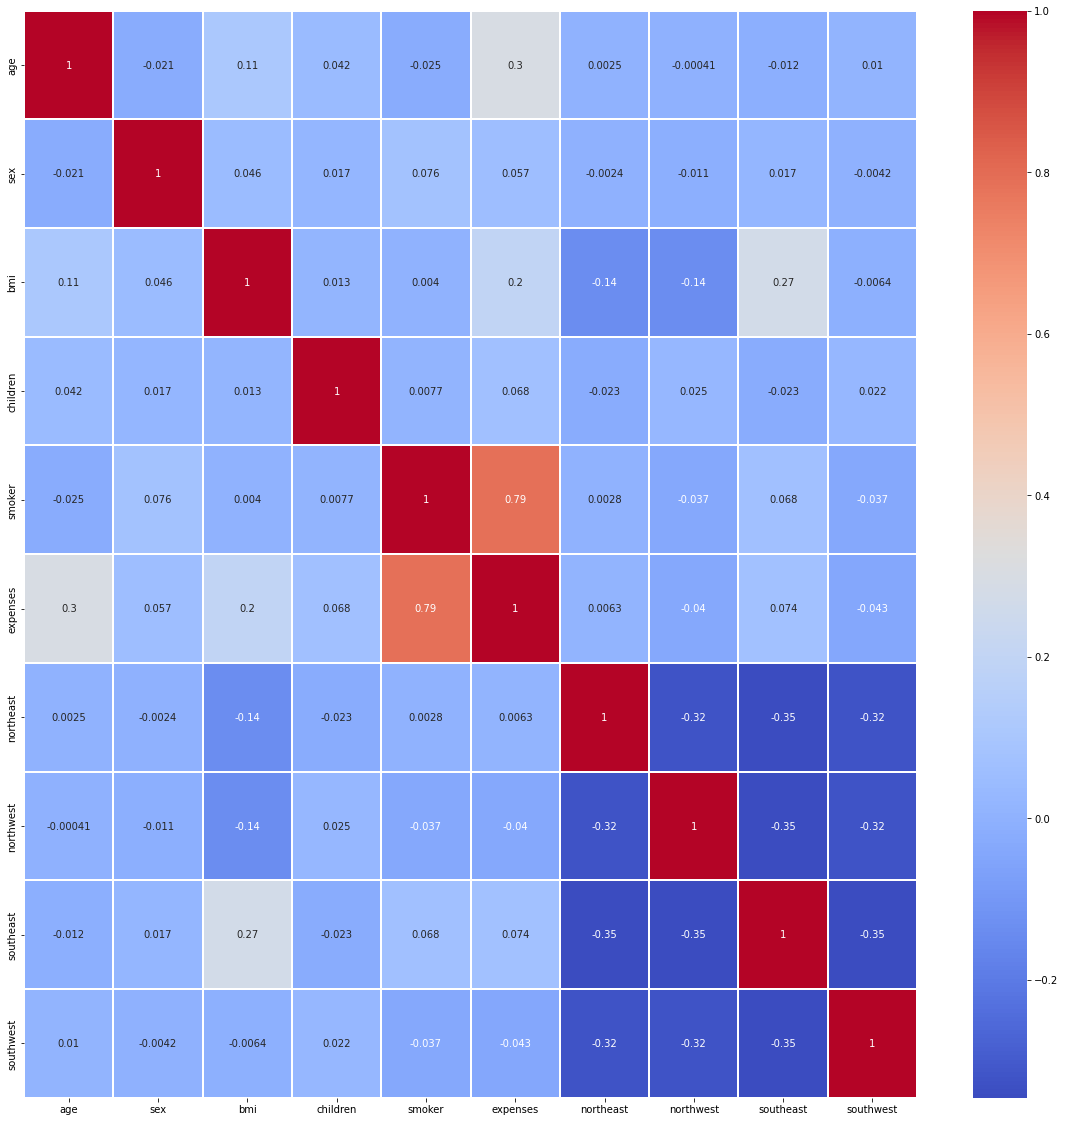

In [12]:
#correlation heatmap to find out highly correlated colomns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=2)

Text(0, 0.5, 'Expenses')

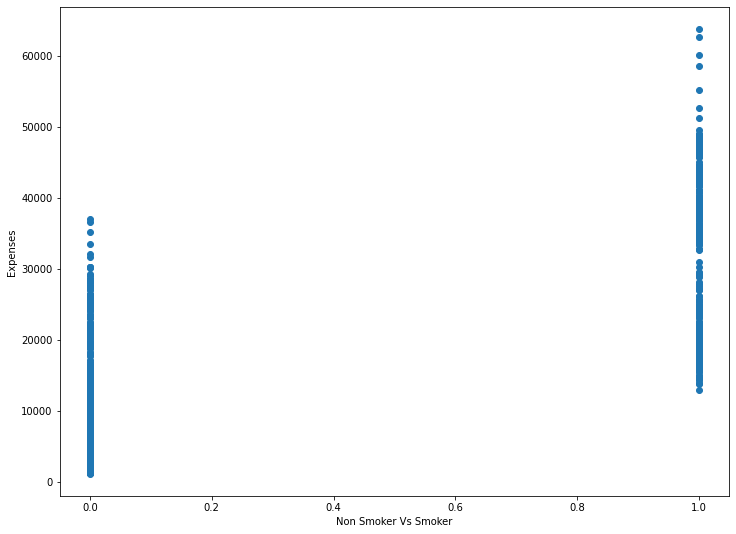

In [15]:
#scatter plot of target based on smoker
x=df["smoker"]
y=df["expenses"]
plt.figure(figsize=(12,9))
plt.scatter(x,y)
plt.xlabel("Non Smoker Vs Smoker")
plt.ylabel("Expenses")

In [ ]:
"""
it is clearly visible that the somkers [30-60K] have more medical expenses than that of non smokers[0-30K]
"""

In [16]:
y=df["expenses"]
x=df.drop("expenses", axis=1)


In [17]:
x

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,0,1
1,18,1,33.8,1,0,0,0,1,0
2,28,1,33.0,3,0,0,0,1,0
3,33,1,22.7,0,0,0,1,0,0
4,32,1,28.9,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,0,1,0,0
1334,18,0,31.9,0,0,1,0,0,0
1335,18,0,36.9,0,0,0,0,1,0
1336,21,0,25.8,0,0,0,0,0,1


In [18]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
#splitting data into 85% for training and 15% for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.15)

In [24]:
from sklearn.linear_model import LinearRegression
#Training a multiple linearregression model
reg=LinearRegression().fit(x_train, y_train)
y_pred=reg.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
#checking the R squared error on test data
r2_score(y_test, y_pred)

0.7444627901815242

In [26]:
#storing independent feature in a temporary variable
p_x=x

In [48]:
from sklearn.preprocessing import PolynomialFeatures
#changing data to a 3rd degree polynomial
pol=PolynomialFeatures(degree=3)
p_x=pol.fit_transform(x)
p_x

array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  0.,  0.],
       [ 1., 28.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  0.,  0.,  0.]])

In [49]:
#training the model similarly but with 3rd degree polynomial of x this time
x_train,x_test,y_train,y_test=train_test_split(p_x,y,random_state=1,test_size=0.15)
reg=LinearRegression().fit(x_train, y_train)
y_pred=reg.predict(x_test)
r2_score(y_test, y_pred)

0.8420597645678192

In [50]:
#cross validating the score to check and avoid overfitting
from sklearn.model_selection import cross_val_score
c=cross_val_score(reg,p_x,y,cv=4)
c

array([0.84867974, 0.79021224, 0.85202701, 0.81605385])

In [51]:
#Final mean accuracy
print("Mean accuracy after cross-validation is: ", c.mean()*100, end="%")

Mean accuracy after cross-validation is:  82.67432107722394%